# Question 1


## Part 1 -> Data Selection

Social Issue - Air Pollution

I am using the **Air Quality Data in India (2015 - 2020) Dataset** from Kaggle consisting of AQI data published by CPCB for 5 years, from ***January, 2015*** till ***July, 2020***. <br/><br/>


Divide the data set into two parts: 
* Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) 
* Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) 
and find how these contents correlated with AQI (air quality index)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
df=pd.read_csv('city_day.csv',parse_dates=['Date'])
raw_df = df

### Converting dates to Pandas datetime format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

In [ ]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))
df['AQI']=df['AQI'].fillna((df['AQI'].median()))
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

df1 = df
df.head()

In [ ]:
df.info()

In [ ]:
plot1 = sns.catplot(x="AQI_Bucket",data=df1,kind="count",height=6,aspect=3)
plot1.set_xticklabels(rotation=90)

## Part2 -> Define the Questions


**A).Investigating the Impact of COVID-19 on Air Pollution:**

How did the levels of various air pollutants (PM2.5, PM10, NO, NO2, NOx, etc.) change in the pre-COVID and post-COVID periods?

Were there significant differences in the Air Quality Index (AQI) between the pre-COVID and post-COVID periods? How did this trend vary across different cities?

Did the changes in air pollution levels correlate with the COVID-19 lockdowns and restrictions? Can we identify any specific events or policies that had a noticeable impact on air quality?


**B).Identifying the Most and Least Polluted Cities:**

Which cities are the most polluted in terms of vehicular pollution? Which metrics (e.g., NO, NO2, NOx) indicate the severity of vehicular pollution in these cities?

Which cities are the most polluted in terms of industrial pollution? Which metrics (e.g., SO2, Benzene, Toluene, Xylene) suggest the impact of industrial activities on air quality in these cities?

Are there any patterns or trends in the geographical distribution of the most and least polluted cities? Can we identify any regional or socioeconomic factors that contribute to the differences in air pollution levels across cities?


**C).Exploring Relationships and Trends:**

Is there a correlation between the levels of different air pollutants? For example, do higher levels of NO and NO2 generally coincide with higher levels of particulate matter (PM2.5 and PM10)?

How do the various air pollutant levels and the AQI index vary seasonally or throughout the year? Are there certain times of the year when air quality is consistently better or worse?

Can we identify any significant relationships between air pollution levels and other factors, such as population, economic activity, or meteorological conditions (temperature, rainfall, wind patterns, etc.)?


**D).Identifying Opportunities for Improvement:**

Which cities show the most promising improvements in air quality over time? What factors or interventions may have contributed to these improvements?

Are there specific pollutants or polluted cities that should be prioritized for targeted mitigation efforts? What types of policies, regulations, or technological solutions could be most effective in addressing the identified air pollution challenges?

How can the insights from this analysis be used to inform decision-making and policy development related to air quality management and environmental sustainability in India?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the dataset
df = pd.read_csv('city_day.csv', parse_dates=['Date'])

# Fill missing values with median
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 
              'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for pollutant in pollutants:
    df[pollutant] = df[pollutant].fillna(df[pollutant].median())

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Split data into pre-COVID and post-COVID periods
pre_covid = df[df['Date'] <= '2020-03-25']
post_covid = df[df['Date'] > '2020-03-25']


In [ ]:
# Question A: Impact of COVID-19 on Air Pollution
def compare_pollution_levels(pre_data, post_data):
    pollutant_groups = {
        'Vehicular': ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO'],
        'Industrial': ['SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    }
    
    results = {}
    
    for group, pollutants in pollutant_groups.items():
        pre_levels = pre_data[pollutants].mean()
        post_levels = post_data[pollutants].mean()
        
        # Calculate percentage change
        percent_changes = ((post_levels - pre_levels) / pre_levels * 100).round(2)
        
        # Perform t-test to check statistical significance
        t_test_results = {}
        for pollutant in pollutants:
            t_stat, p_val = stats.ttest_ind(pre_data[pollutant], post_data[pollutant])
            t_test_results[pollutant] = {
                'p_value': p_val,
                'statistically_significant': p_val < 0.05
            }
        
        results[group] = {
            'pre_levels': pre_levels.to_dict(),
            'post_levels': post_levels.to_dict(),
            'percent_changes': percent_changes.to_dict(),
            't_test_results': t_test_results
        }
    
    return results

In [ ]:
# Question B: Most and Least Polluted Cities
def analyze_city_pollution(data):
    pollutant_groups = {
        'Vehicular': ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO'],
        'Industrial': ['SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    }
    
    city_pollution = {}
    
    for group, pollutants in pollutant_groups.items():
        city_avg = data.groupby('City')[pollutants].mean()
        total_pollution = city_avg.sum(axis=1)
        
        city_pollution[group] = {
            'most_polluted': total_pollution.nlargest(5).to_dict(),
            'least_polluted': total_pollution.nsmallest(5).to_dict()
        }
    
    return city_pollution

In [ ]:
# Question C: Correlations and Trends
def analyze_correlations(data):
    pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 
                  'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    
    correlation_matrix = data[pollutants].corr()
    
    # Seasonal analysis
    data['Month'] = data['Date'].dt.month
    seasonal_avg = data.groupby('Month')[pollutants].mean()
    
    return {
        'correlation_matrix': correlation_matrix,
        'seasonal_averages': seasonal_avg
    }


In [ ]:

# Question D: Improvement Opportunities
def analyze_improvements(data):
    pollutant_groups = {
        'Vehicular': ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO'],
        'Industrial': ['SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
    }
    
    # Group by city and year to track improvements
    data['Year'] = data['Date'].dt.year
    yearly_city_pollution = data.groupby(['City', 'Year'])[list(pollutant_groups['Vehicular'] + pollutant_groups['Industrial'])].mean()
    
    # Calculate year-over-year improvements
    improvements = {}
    for group, pollutants in pollutant_groups.items():
        improvements[group] = {}
        for city in data['City'].unique():
            city_data = yearly_city_pollution.loc[city]
            if len(city_data) > 1:
                city_improvements = (city_data.iloc[0] - city_data.iloc[-1]) / city_data.iloc[0] * 100
                improvements[group][city] = city_improvements.round(2)
    
    return improvements


In [28]:
covid_impact = compare_pollution_levels(pre_covid, post_covid)


print("COVID Impact on Pollution Levels:")
for group, data in covid_impact.items():
    print(f"\n{group} Pollution:")
    print("Percent Changes:", data['percent_changes'])

COVID Impact on Pollution Levels:

Vehicular Pollution:
Percent Changes: {'PM2.5': -56.79, 'PM10': -38.88, 'NO': -23.22, 'NO2': -46.83, 'NOx': -40.72, 'NH3': -25.56, 'CO': -67.65}

Industrial Pollution:
Percent Changes: {'SO2': -26.48, 'O3': 0.94, 'Benzene': -12.25, 'Toluene': -32.95, 'Xylene': -24.99}


In [37]:
city_pollution = analyze_city_pollution(df)
city_pollution

{'Vehicular': {'most_polluted': {'Delhi': 536.8171777003485,
   'Patna': 335.7160548977395,
   'Gurugram': 334.4891244788565,
   'Kolkata': 326.19067567567566,
   'Ahmedabad': 299.59135390741665},
  'least_polluted': {'Aizawl': 86.6788495575221,
   'Shillong': 106.57387096774194,
   'Thiruvananthapuram': 112.00747302158273,
   'Coimbatore': 148.23945595854923,
   'Ernakulam': 154.1085802469136}},
 'Industrial': {'most_polluted': {'Ahmedabad': 106.50561971129916,
   'Shillong': 105.7351935483871,
   'Delhi': 87.98897959183674,
   'Bhopal': 76.91079584775086,
   'Patna': 73.25429494079656},
  'least_polluted': {'Kochi': 23.46771604938272,
   'Aizawl': 32.15725663716814,
   'Ernakulam': 36.26981481481481,
   'Brajrajnagar': 37.433283582089544,
   'Coimbatore': 38.51455958549223}}}

In [38]:
correlations = analyze_correlations(df)
correlations

{'correlation_matrix':             PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
 PM2.5    1.000000  0.520767  0.435245  0.358287  0.375938  0.164615  0.093695   
 PM10     0.520767  1.000000  0.433864  0.352396  0.416523  0.200548  0.023932   
 NO       0.435245  0.433864  1.000000  0.465848  0.747409  0.155804  0.221445   
 NO2      0.358287  0.352396  0.465848  1.000000  0.581938  0.151731  0.361750   
 NOx      0.375938  0.416523  0.747409  0.581938  1.000000  0.129433  0.231878   
 NH3      0.164615  0.200548  0.155804  0.151731  0.129433  1.000000 -0.014252   
 CO       0.093695  0.023932  0.221445  0.361750  0.231878 -0.014252  1.000000   
 SO2      0.120451  0.165468  0.174881  0.388413  0.205912 -0.048679  0.476784   
 O3       0.166064  0.208398  0.020788  0.289435  0.089095  0.076295  0.043311   
 Benzene  0.030539  0.027522  0.045202  0.042179  0.049004  0.004093  0.066022   
 Toluene  0.132609  0.126400  0.151930  0.297913  0.184764  0.020040  0.2855

In [40]:
improvement_opportunities = analyze_improvements(df)
# improvement_opportunities

## Part3 and Part5-> Data Analysis and Data Visualization

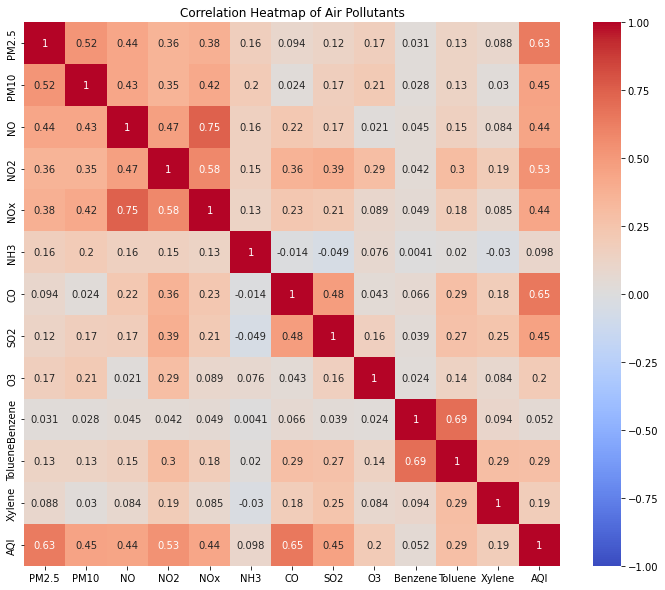

In [30]:
# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[pollutants].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Air Pollutants')
plt.show()


<Figure size 1080x576 with 0 Axes>

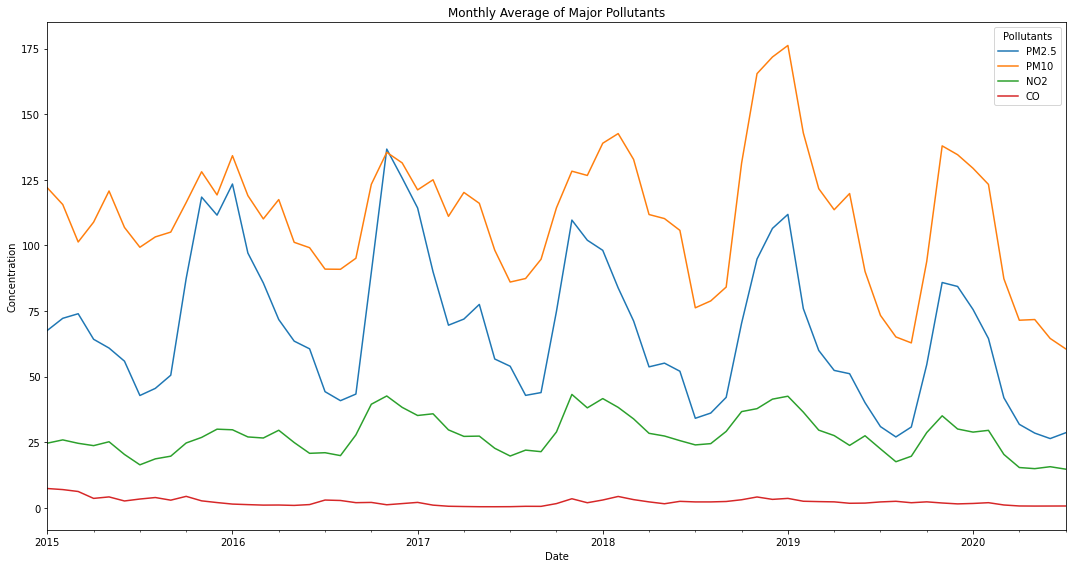

In [31]:
# 2. Time Series of Major Pollutants
plt.figure(figsize=(15, 8))
major_pollutants = ['PM2.5', 'PM10', 'NO2', 'CO']
df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))[major_pollutants].mean()
df_monthly.plot(figsize=(15,8))
plt.title('Monthly Average of Major Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()

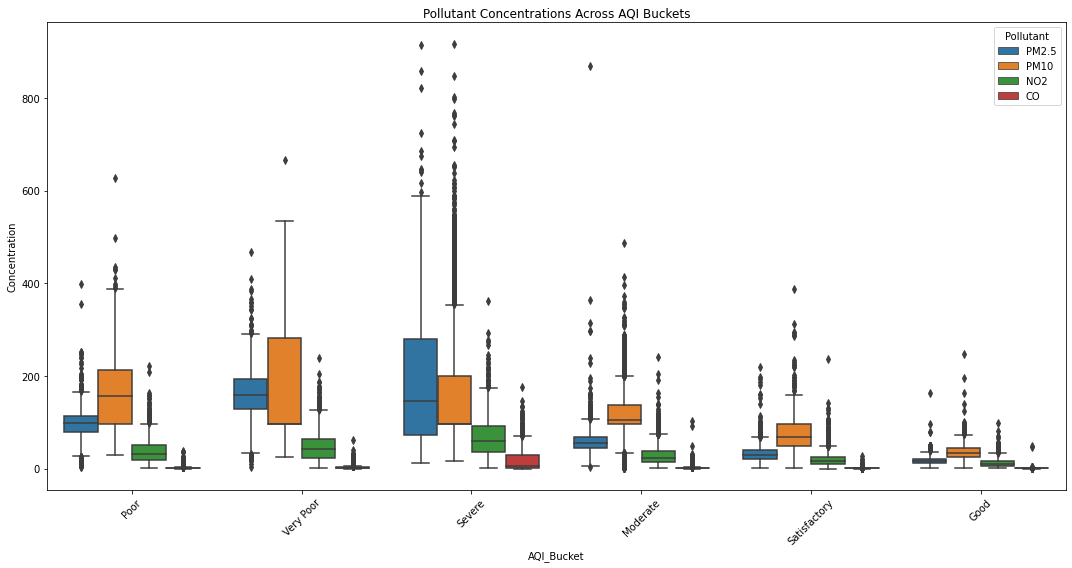

In [32]:
# 3. Box Plot of Pollutants by AQI Bucket
plt.figure(figsize=(15, 8))
df_melted = df.melt(id_vars=['AQI_Bucket'], value_vars=major_pollutants, 
                    var_name='Pollutant', value_name='Concentration')
sns.boxplot(x='AQI_Bucket', y='Concentration', hue='Pollutant', data=df_melted)
plt.title('Pollutant Concentrations Across AQI Buckets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

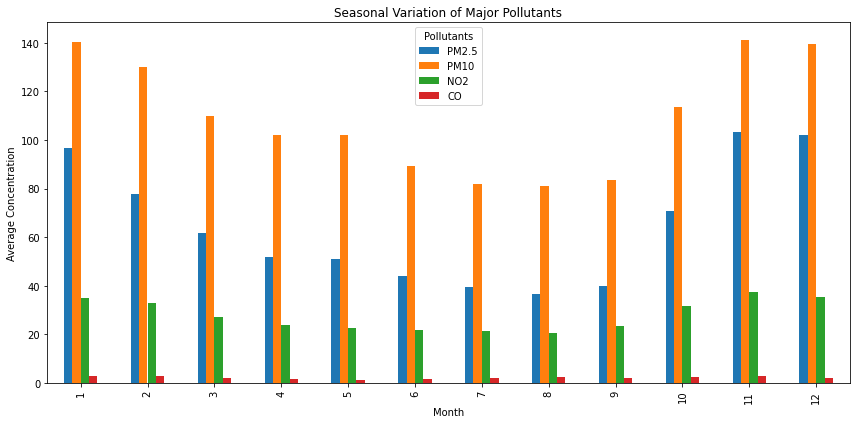

In [33]:
# 4. Seasonal Variation of Pollutants
df['Month'] = df['Date'].dt.month
seasonal_pollutants = df.groupby('Month')[major_pollutants].mean()

plt.figure(figsize=(12, 6))
seasonal_pollutants.plot(kind='bar', figsize=(12,6))
plt.title('Seasonal Variation of Major Pollutants')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()

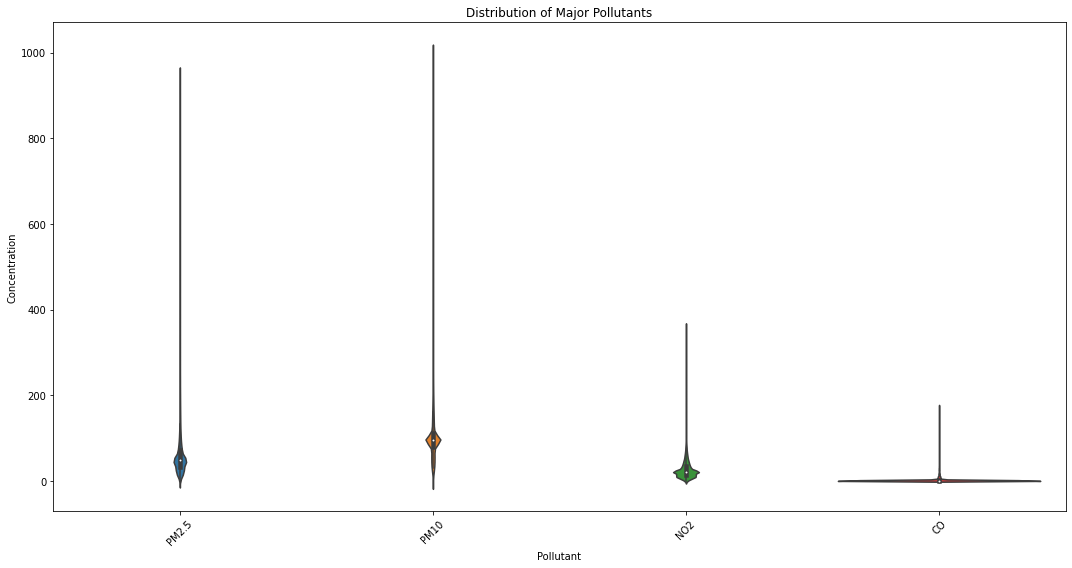

In [35]:
# 5. Violin Plot of Pollutant Distributions
plt.figure(figsize=(15, 8))
df_melted = df.melt(value_vars=major_pollutants, 
                    var_name='Pollutant', value_name='Concentration')
sns.violinplot(x='Pollutant', y='Concentration', data=df_melted)
plt.title('Distribution of Major Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

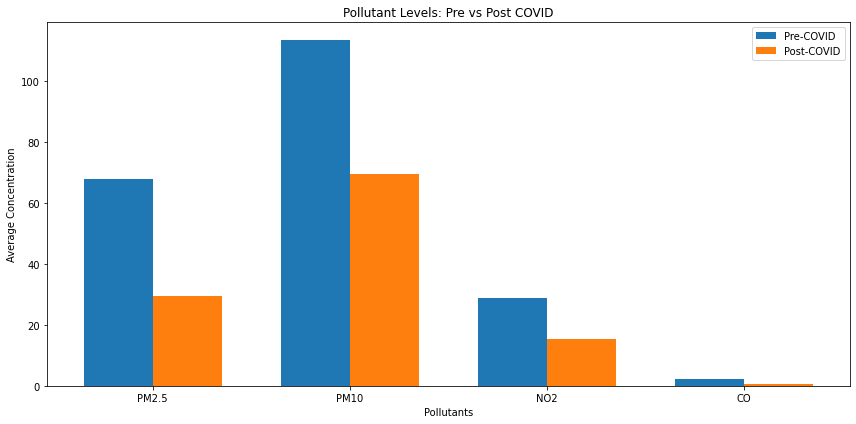

In [36]:
# 6. Pre vs Post COVID Pollution Comparison
pre_covid = df[df['Date'] <= '2020-03-25']
post_covid = df[df['Date'] > '2020-03-25']

plt.figure(figsize=(12, 6))
periods = ['Pre-COVID', 'Post-COVID']
pollutant_means = [
    pre_covid[major_pollutants].mean(),
    post_covid[major_pollutants].mean()
]

x = np.arange(len(major_pollutants))
width = 0.35

plt.bar(x - width/2, pollutant_means[0], width, label='Pre-COVID')
plt.bar(x + width/2, pollutant_means[1], width, label='Post-COVID')

plt.title('Pollutant Levels: Pre vs Post COVID')
plt.xlabel('Pollutants')
plt.ylabel('Average Concentration')
plt.xticks(x, major_pollutants)
plt.legend()
plt.tight_layout()

# Pre-Covid

In [ ]:
df = df[df['Date'] <= ('25-03-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt

def max_bar_plot_matplotlib(var):
    # Grouping, calculating median, sorting, and selecting top 10
    top_10 = df[['City', var]].groupby("City").median().sort_values(by=var, ascending=False).head(10)
    # Plot
    plt.figure(figsize=(10, 6))
    top_10[var].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Most Polluted Cities by {var}", fontsize=14)
    plt.xlabel('Cities', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
max_bar_plot_matplotlib('Industrial Pollution content')
max_bar_plot_matplotlib('Vehicular Pollution content')


In [ ]:
import matplotlib.pyplot as plt

def min_bar_plot_matplotlib(var):
    # Grouping, calculating mean, sorting, and selecting bottom 10
    bottom_10 = df[['City', var]].groupby("City").mean().sort_values(by=var, ascending=True).head(10)
    # Plot
    plt.figure(figsize=(10, 6))
    bottom_10[var].plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f"Top 10 Least Polluted Cities by {var}", fontsize=14)
    plt.xlabel('Cities', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
min_bar_plot_matplotlib('Industrial Pollution content')
min_bar_plot_matplotlib('Vehicular Pollution content')


# Post-COVID

In [ ]:
df = df1.copy()
df = df[df['Date'] > ('25-03-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

In [ ]:
import matplotlib.pyplot as plt

def max_bar_plot_matplotlib(var):
    # Grouping, calculating median, sorting, and selecting top 10
    top_10 = df[['City', var]].groupby("City").median().sort_values(by=var, ascending=False).head(10)
    # Plot
    plt.figure(figsize=(10, 6))
    top_10[var].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top 10 Most Polluted Cities by {var}", fontsize=14)
    plt.xlabel('Cities', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
max_bar_plot_matplotlib('Industrial Pollution content')
max_bar_plot_matplotlib('Vehicular Pollution content')


In [ ]:
import matplotlib.pyplot as plt

def min_bar_plot_matplotlib(var):
    # Grouping, calculating mean, sorting, and selecting bottom 10
    bottom_10 = df[['City', var]].groupby("City").mean().sort_values(by=var, ascending=True).head(10)
    # Plot
    plt.figure(figsize=(10, 6))
    bottom_10[var].plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f"Top 10 Least Polluted Cities by {var}", fontsize=14)
    plt.xlabel('Cities', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
min_bar_plot_matplotlib('Industrial Pollution content')
min_bar_plot_matplotlib('Vehicular Pollution content')


## Part4->Building ML model

In [ ]:
df = df1.copy()
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
categorical_attributes

In [ ]:
le=LabelEncoder()
df['City']=le.fit_transform(df['City'].astype(str))
df['AQI_Bucket']=le.fit_transform(df['AQI_Bucket'].astype(str))
df.info()

In [ ]:
y = df["AQI_Bucket"]
x = df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
print('Classes and number of values in trainset',Counter(y_train))

In [ ]:
df.AQI_Bucket.unique()

In [ ]:
df.head()

### Data Imbalance:

Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

### Setting up the model

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report,
    roc_auc_score,
    roc_curve
)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
def compare_models(X_train, X_test, y_train, y_test):
    """
    Train and compare multiple machine learning models
    """
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models with hyperparameters
    models = {
        'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Extra Trees': ExtraTreesClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42),
        'Naive Bayes': GaussianNB()
    }
    
    # Results storage
    model_results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        # Fit the model
        model.fit(X_train_scaled, y_train)
        
        # Predict
        y_pred = model.predict(X_test_scaled)
        
        # Evaluate
        model_results[name] = evaluate_model(y_test, y_pred, name)
    
    # Create a summary DataFrame
    results_df = pd.DataFrame.from_dict(model_results, orient='index')
    results_df.sort_values('accuracy', ascending=False, inplace=True)
    
    # Plot model comparison
    plt.figure(figsize=(10, 6))
    results_df['accuracy'].plot(kind='bar')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return results_df

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Comprehensive model evaluation
    """
    print(f"\n--- {model_name} Evaluation Metrics ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (Macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (Macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score (Macro):", f1_score(y_true, y_pred, average='macro'))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_confusion_matrix.png')
    plt.close()
    
    # Classification Report
    print("\nDetailed Classification Report:")
    print(classification_report(y_true, y_pred))
    
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1_score': f1_score(y_true, y_pred, average='macro')
    }

In [43]:
# Compare models
model_comparison_results = compare_models(X_train, X_test, y_train, y_test)


--- Logistic Regression Evaluation Metrics ---
Accuracy: 0.728457761977315
Precision (Macro): 0.710095293514479
Recall (Macro): 0.7969166502758673
F1 Score (Macro): 0.7433554664124365

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       262
           1       0.86      0.68      0.76      2761
           2       0.47      0.64      0.54       578
           3       0.68      0.77      0.72      1574
           4       0.90      0.99      0.95       249
           5       0.67      0.71      0.69       483

    accuracy                           0.73      5907
   macro avg       0.71      0.80      0.74      5907
weighted avg       0.75      0.73      0.73      5907


--- Decision Tree Evaluation Metrics ---
Accuracy: 1.0
Precision (Macro): 1.0
Recall (Macro): 1.0
F1 Score (Macro): 1.0

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1

In [50]:
# ROC Curve for Multi-class Classification
def plot_roc_curve(X_test, y_test, models):
    """
    Plot ROC curves for multi-class classification
    """
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        # One-vs-Rest ROC
        y_score = model.predict_proba(X_test)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        for i in range(len(np.unique(y_test))):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
            roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])
        
        # Plot ROC curve
        plt.plot(fpr[1], tpr[1], label=f'{name} (area = {roc_auc[1]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

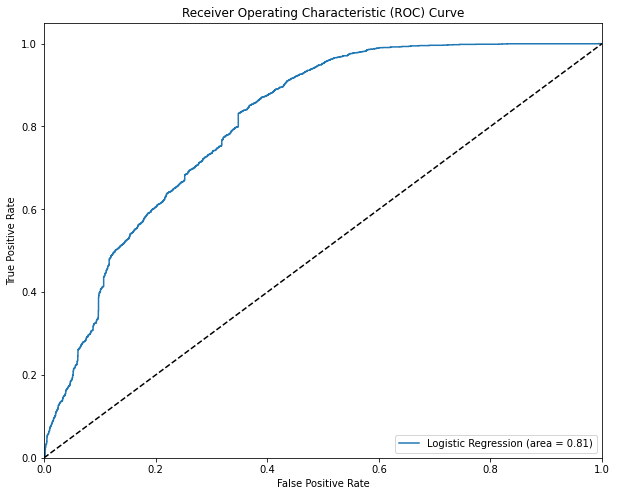

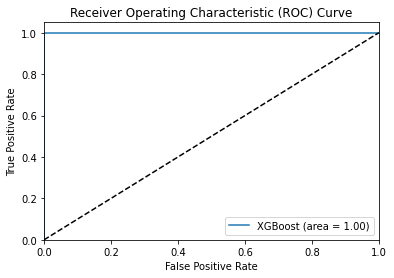

In [51]:
# Train models
trained_models = {}
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    # 'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    # 'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42),
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

# Plot ROC curves
plot_roc_curve(X_test_scaled, y_test, trained_models)

## Part 7 -> Summary And Conclusion

## Pre-COVID Lockdown

* Ahmedabad has max Industrial Pollution
* Delhi has max Vehicular Pollution

* Thiruvananthapuram has min Industrial Pollution
* Chennai has min Vehicular Pollution

* Majority of the cities had "Moderate" satisfaction level for breatheable Air

## Post-COVID Lockdown

* Ahmedabad has max Industrial Pollution
* Patna has max Vehicular Pollution

* Hyderabad has min Industrial Pollution
* Guwahati has min Vehicular Pollution

* Majority of the cities had "Satisfactory" satisfaction level for breatheable Air


## Overall
* After COVID19 pandemic there is gradual dicrease in vehicular pollution contents and a significant decrease in industrial pollution content.